# Lesson 6 Assignment - Advertising Sales Regression

## Author - Aeden Jameson



### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import sklearn.preprocessing as sk
import scipy.stats as ss

%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)
print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9
(200, 4)


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Regression 1: TV Ad Spend vs Sales

Before performing the regression let's visually inspect whether the variables have a positive linear correlation.

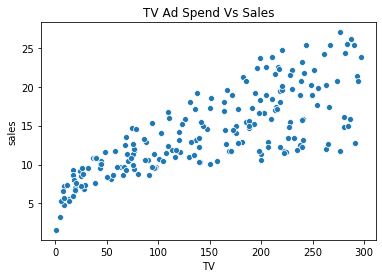

In [3]:
ax = sns.scatterplot(x="TV", y="sales", data=ad_data)
ax.set(title='TV Ad Spend Vs Sales');

From above we can see that we have a mostly straight line in which case we'll move on to applying a linear regression

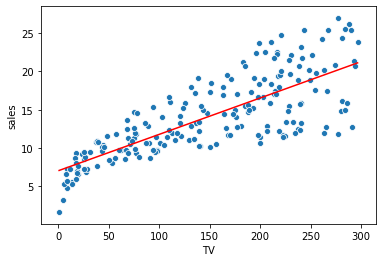

In [4]:
## Define the regresson model and fit it to the data
tv_sales = sm.ols(formula = 'sales ~ TV', data=ad_data).fit()
ad_data['predicted_sales'] = tv_sales.predict(ad_data.TV)

ax = sns.lineplot(x='TV', y='predicted_sales', data=ad_data, color='red')

sns.scatterplot(x='TV', y='sales', data=ad_data, ax=ax);

In [5]:
print('Intercept = %4.3f  Slope = %4.3f' % (tv_sales._results.params[0], tv_sales._results.params[1]))

Intercept = 7.033  Slope = 0.048


#### Interpretations

**Slope**: The value of the slope is quite small. As TV ad spend increases sales increases slowly. More precisely for each dollar spent in TV ad revenue we would make about five cents in sales. 

**Intercept**: The intercept in this case could be understand as if one didn't spend any TV ad money one would make about $7.

## Regression 2: Radio & Sales

Before performing the regression let's visually inspect whether the variables have a positive linear correlation.

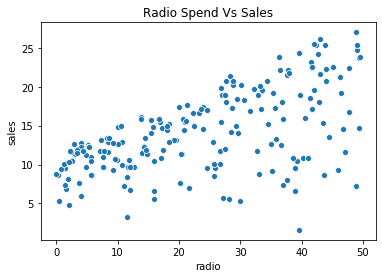

In [6]:
ax = sns.scatterplot(x="radio", y="sales", data=ad_data)
ax.set(title='Radio Spend Vs Sales');

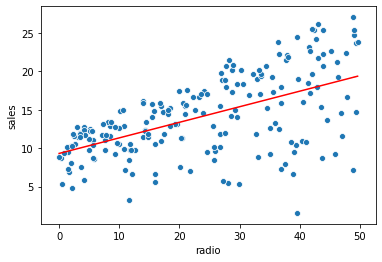

In [7]:
## Define the regresson model and fit it to the data
radio_sales = sm.ols(formula = 'sales ~ radio', data=ad_data).fit()
ad_data['predicted_sales'] = radio_sales.predict(ad_data.radio)

ax = sns.lineplot(x='radio', y='predicted_sales', data=ad_data, color='red')
sns.scatterplot(x='radio', y='sales', data=ad_data, ax=ax);

In [8]:
print('Intercept = %4.3f  Slope = %4.3f' % (radio_sales._results.params[0], radio_sales._results.params[1]))

Intercept = 9.312  Slope = 0.202


#### Interpretations

**Slope**: As radio ad spend increases sales increases better than TV. More precisely for each dollar spent in radio ad revenue we would make about 20 cents in sales. 

**Intercept**: The intercept in this case could be understand as if one didn't spend any TV ad money one would make about $9.

## Regression 3: Newspaper Ad Spend vs Sales

Before performing the regression let's visually inspect whether the variables have a positive linear correlation.

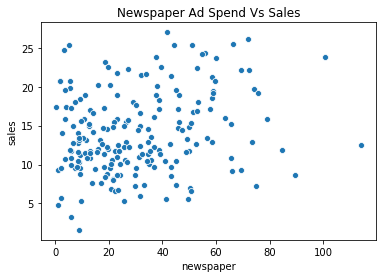

In [9]:
ax = sns.scatterplot(x="newspaper", y="sales", data=ad_data)
ax.set(title='Newspaper Ad Spend Vs Sales');

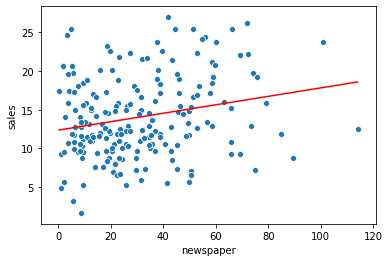

In [10]:
## Define the regresson model and fit it to the data
news_sales = sm.ols(formula = 'sales ~ newspaper', data=ad_data).fit()
ad_data['predicted_sales'] = news_sales.predict(ad_data.newspaper)

ax = sns.lineplot(x='newspaper', y='predicted_sales', data=ad_data, color='red')
sns.scatterplot(x='newspaper', y='sales', data=ad_data, ax=ax);

In [11]:
print('Intercept = %4.3f  Slope = %4.3f' % (news_sales._results.params[0], news_sales._results.params[1]))

Intercept = 12.351  Slope = 0.055


#### Interpretations

**Slope**: As newspaper ad spend increases sales increases better than TV, but worse than radio. More precisely for each dollar spent in newspaper ad revenue we would make about 5.5 cents in sales. 

**Intercept**: The intercept in this case could be understand as if one didn't spend any newspaper ad money one would make about $12.

## Regression 4: TV,Radio & Newspaper Ad Spend vs Sales

In [12]:
## Define the regresson model and fit it to the data
comb_sales = sm.ols(formula = 'sales ~ TV + radio + newspaper', data=ad_data).fit()
ad_data['predicted_sales'] = comb_sales.predict(ad_data[['TV','radio','newspaper']])

In [13]:
comb_sales.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 01 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        08:37:58   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpreting Partial Slopes & Intercept

**TV Slope**: For each dollar spent on a TV ad revenue sales will increase by about 4.5 cents.

**Radio Slope**: For each dollar spent on a radio ad revenue sales will increase by about 19 cents.

**Newspaper Slope**: For each dollar spent on a radio ad revenue sales will decrease by about .1 cents.

**Intercept**: The intercept in this case could be understand as if one didn't spend any ad revenue in any of the mediums one would make about $3.

#### Interpret Adjusted R-squared.

The adjusted R-squared value is .896, which is pretty close to the perfect value of 1. In which case we can conclude the model is a good fit.

#### Report The Mean-Squared Error.

The first step in calculating the MSE is determining the residuals.

In [14]:
# Add residuals to pandas dataframe
ad_data['resids'] = np.subtract(ad_data.predicted_sales, ad_data.sales)

In [15]:
RMSE = np.std(ad_data.resids)
print('RMSE = %4.3f' % (RMSE))

RMSE = 1.669


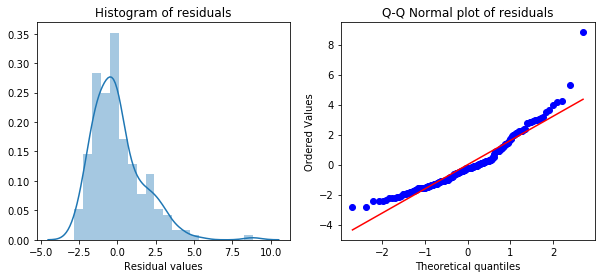

In [16]:
def plot_resid_dist(resids):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ## Plot a histogram
    sns.distplot(resids, bins=20, ax=ax[0])
    ax[0].set_title('Histogram of residuals')
    ax[0].set_xlabel('Residual values')
    ## Plot the Q-Q Normal plot
    ss.probplot(resids, plot = ax[1])
    ax[1].set_title('Q-Q Normal plot of residuals')
    plt.show()

plot_resid_dist(ad_data.resids)

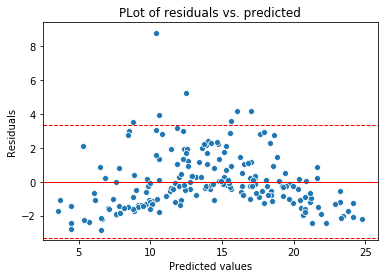

In [17]:
def residual_plot(df):
    RMSE = np.std(df.resids)
    sns.scatterplot(x='predicted_sales', y='resids', data=df)
    plt.axhline(0.0, color='red', linewidth=1.0)
    plt.axhline(2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.axhline(-2.0*RMSE, color='red', linestyle='dashed', linewidth=1.0)
    plt.title('PLot of residuals vs. predicted')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.show()
    
residual_plot(ad_data)    